Using pybaseball and pandas to analyze MLB data and understand why the Reds are not doing good.

In [101]:
import pybaseball as pb
import pandas as pd

First, let's start by looking at the current mlb standings.

In [9]:
pb.standings()

[                  Tm   W   L  W-L%    GB  E#
 1  Baltimore Orioles  67  46  .593    --  --
 2   New York Yankees  67  46  .593    --  --
 3     Boston Red Sox  59  51  .536   6.5  45
 4     Tampa Bay Rays  57  54  .514   9.0  42
 5  Toronto Blue Jays  51  61  .455  15.5  35,
                     Tm   W   L  W-L%    GB  E#
 1  Cleveland Guardians  67  44  .604    --  --
 2      Minnesota Twins  62  48  .564   4.5  48
 3   Kansas City Royals  63  50  .558   5.0  46
 4       Detroit Tigers  53  60  .469  15.0  36
 5    Chicago White Sox  27  87  .237  41.5   9,
                    Tm   W   L  W-L%    GB  E#
 1    Seattle Mariners  59  54  .522    --  --
 2      Houston Astros  57  54  .514   1.0  50
 3       Texas Rangers  53  59  .473   5.5  45
 4  Los Angeles Angels  49  63  .438   9.5  41
 5   Oakland Athletics  46  67  .407  13.0  37,
                       Tm   W   L  W-L%    GB  E#
 1  Philadelphia Phillies  66  45  .595    --  --
 2         Atlanta Braves  60  51  .541   6.0  46
 

That gave the standings for the entire MLB. Now, let's look at the standings for the National League Central Division.

In [12]:
pb.standings(2024)[4]

,Tm,W,L,W-L%,GB,E#
1,Milwaukee Brewers,62,49,.559,--,--
2,St. Louis Cardinals,57,55,.509,5.5,46
3,Pittsburgh Pirates,56,55,.505,6.0,46
4,Chicago Cubs,55,59,.482,8.5,42
5,Cincinnati Reds,53,58,.477,9.0,43


As we can see, the Reds are currently in last as I am writing this. Let's look at the Reds' individual game stats and try to find some reasons why they are not doing well.

In [21]:
reds = pb.schedule_and_record(2024, 'CIN')
reds

http://www.baseball-reference.com/teams/CIN/2024-schedule-scores.shtml


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Thursday, Mar 28",CIN,Home,WSN,W,8.0,2.0,9.0,1-0,1.0,Tied,Montas,Gray,None,2:18,D,44030.0,.95,1.0,None
2,"Saturday, Mar 30",CIN,Home,WSN,L,6.0,7.0,9.0,1-1,3.0,1.5,Harvey,Díaz,Finnegan,2:55,D,39674.0,.96,-1.0,None
3,"Sunday, Mar 31",CIN,Home,WSN,W-wo,6.0,5.0,9.0,2-1,3.0,1.5,Sims,Finnegan,None,2:50,D,13590.0,.90,1.0,None
4,"Monday, Apr 1",CIN,@,PHI,W,6.0,3.0,10.0,3-1,3.0,1.5,Díaz,Brogdon,None,3:04,N,33754.0,.94,2.0,None
5,"Tuesday, Apr 2",CIN,@,PHI,L,4.0,9.0,9.0,3-2,3.0,2.0,Turnbull,Ashcraft,Pinto,2:44,N,28119.0,1.01,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,"Tuesday, Sep 24",CIN,@,CLE,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,None
159,"Wednesday, Sep 25",CIN,@,CLE,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,None
160,"Friday, Sep 27",CIN,@,CHC,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,None
161,"Saturday, Sep 28",CIN,@,CHC,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,None


Now, this gives us a look at the Reds' entire season, but we just want to look at the games that have already been played. Let's filter out the games that have already been played.

In [22]:
reds.dropna(subset=['W/L'], inplace=True)
reds

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Thursday, Mar 28",CIN,Home,WSN,W,8.0,2.0,9.0,1-0,1.0,Tied,Montas,Gray,None,2:18,D,44030.0,.95,1.0,None
2,"Saturday, Mar 30",CIN,Home,WSN,L,6.0,7.0,9.0,1-1,3.0,1.5,Harvey,Díaz,Finnegan,2:55,D,39674.0,.96,-1.0,None
3,"Sunday, Mar 31",CIN,Home,WSN,W-wo,6.0,5.0,9.0,2-1,3.0,1.5,Sims,Finnegan,None,2:50,D,13590.0,.90,1.0,None
4,"Monday, Apr 1",CIN,@,PHI,W,6.0,3.0,10.0,3-1,3.0,1.5,Díaz,Brogdon,None,3:04,N,33754.0,.94,2.0,None
5,"Tuesday, Apr 2",CIN,@,PHI,L,4.0,9.0,9.0,3-2,3.0,2.0,Turnbull,Ashcraft,Pinto,2:44,N,28119.0,1.01,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,"Wednesday, Jul 31",CIN,Home,CHC,L,4.0,13.0,9.0,52-56,4.0,9.0,Hendricks,Lodolo,None,2:39,N,20733.0,.46,-1.0,None
109,"Friday, Aug 2",CIN,Home,SFG,L,0.0,3.0,9.0,52-57,5.0,10.0,Snell,Abbott,None,2:16,N,28075.0,.39,-2.0,None
110,"Saturday, Aug 3",CIN,Home,SFG,W,6.0,4.0,9.0,53-57,4.0,9.0,Greene,Harrison,Díaz,2:14,N,32602.0,.32,1.0,None
111,"Sunday, Aug 4",CIN,Home,SFG,L,2.0,8.0,9.0,53-58,5.0,9.0,Ray,Spiers,None,2:55,D,27692.0,.36,-1.0,None


That's a little hard to read, so let's look at the summary statistics for the Reds' games that have already been played.

In [23]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,4.419643,4.107143,9.044643,3.794643,28099.392857,-0.133929
std,3.172626,2.490910,0.207447,0.860948,10349.374726,2.406805
min,0.000000,0.000000,9.000000,1.000000,9460.000000,-8.000000
25%,2.000000,2.000000,9.000000,3.000000,19352.250000,-2.000000
50%,4.000000,4.000000,9.000000,4.000000,27517.500000,-1.000000
75%,6.000000,6.000000,9.000000,4.000000,36607.000000,1.000000
max,13.000000,13.000000,10.000000,5.000000,53527.000000,7.000000


Huh, that's weird. The Reds have a higher average runs scored than the average runs allowed, but they still have a losing record. Let's plot the runs scored and runs allowed for each game to see if we can find any patterns.

c:\Users\rdsip\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='R', ylabel='RA'>

<Figure size 640x480 with 0 Axes>

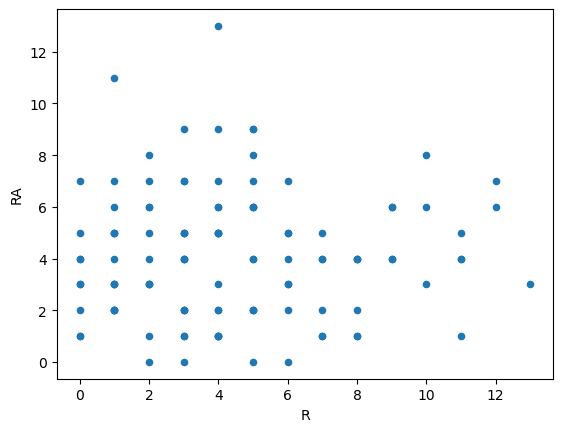

In [26]:
import matplotlib.pyplot as plt

plt.figure()
reds.plot.scatter(x='R', y='RA', colormap='viridis')

That doesn't really help us much.  First, we need to calculate the difference between the runs scored and runs allowed.

In [49]:
reds = reds.assign(RD=reds['R'] - reds['RA'])
reds


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,RD
1,"Thursday, Mar 28",CIN,Home,WSN,W,8.0,2.0,9.0,1-0,1.0,...,Montas,Gray,None,2:18,D,44030.0,.95,1.0,None,6.0
2,"Saturday, Mar 30",CIN,Home,WSN,L,6.0,7.0,9.0,1-1,3.0,...,Harvey,Díaz,Finnegan,2:55,D,39674.0,.96,-1.0,None,-1.0
3,"Sunday, Mar 31",CIN,Home,WSN,W-wo,6.0,5.0,9.0,2-1,3.0,...,Sims,Finnegan,None,2:50,D,13590.0,.90,1.0,None,1.0
4,"Monday, Apr 1",CIN,@,PHI,W,6.0,3.0,10.0,3-1,3.0,...,Díaz,Brogdon,None,3:04,N,33754.0,.94,2.0,None,3.0
5,"Tuesday, Apr 2",CIN,@,PHI,L,4.0,9.0,9.0,3-2,3.0,...,Turnbull,Ashcraft,Pinto,2:44,N,28119.0,1.01,-1.0,None,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,"Wednesday, Jul 31",CIN,Home,CHC,L,4.0,13.0,9.0,52-56,4.0,...,Hendricks,Lodolo,None,2:39,N,20733.0,.46,-1.0,None,-9.0
109,"Friday, Aug 2",CIN,Home,SFG,L,0.0,3.0,9.0,52-57,5.0,...,Snell,Abbott,None,2:16,N,28075.0,.39,-2.0,None,-3.0
110,"Saturday, Aug 3",CIN,Home,SFG,W,6.0,4.0,9.0,53-57,4.0,...,Greene,Harrison,Díaz,2:14,N,32602.0,.32,1.0,None,2.0
111,"Sunday, Aug 4",CIN,Home,SFG,L,2.0,8.0,9.0,53-58,5.0,...,Ray,Spiers,None,2:55,D,27692.0,.36,-1.0,None,-6.0


<Axes: xlabel='W/L', ylabel='RD'>

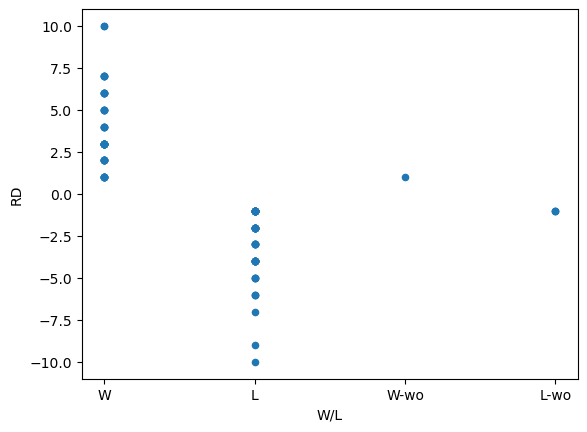

In [39]:
reds.plot.scatter(x='W/L', y='RD')

This tells us that they win games when they score more runs than they allow, but they lose games when they allow more runs than they score. Let's look at the distribution of the difference between runs scored and runs allowed.

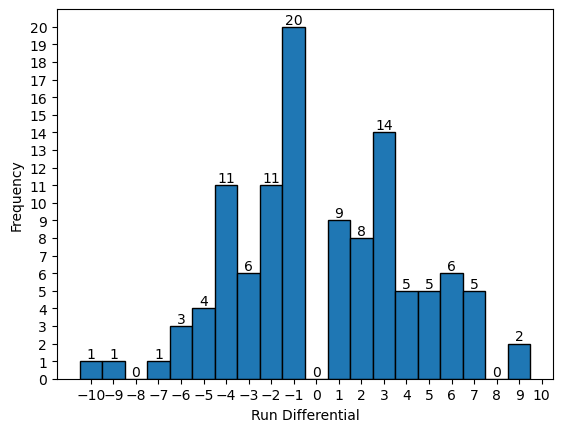

In [87]:
import numpy as np
counts, edges, bars = plt.hist(reds['RD'], bins = np.arange(min(reds['RD']), max(reds['RD']) + 1), align = 'left', edgecolor = 'black')
plt.xlabel('Run Differential')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(reds['RD']), max(reds['RD']) + 1, 1))
plt.yticks(np.arange(0, max(counts) + 1, 1))
plt.bar_label(bars, fmt = '%d')
plt.show()

So as you can see, one of the main issues is that the Reds right now are losing a lot more close games than they are winning. Let's compare the Reds' record in close games(1 or 2 run games) to the record of the rest of the league.

In [171]:
teams = pb.team_ids(2020)
teams.reset_index(drop=True, inplace=True)
print(teams['teamIDBR'])

0     BAL
1     BOS
2     CHW
3     CLE
4     DET
5     HOU
6     KCR
7     LAA
8     MIN
9     NYY
10    OAK
11    SEA
12    TBR
13    TEX
14    TOR
15    ARI
16    ATL
17    CHC
18    CIN
19    COL
20    LAD
21    MIA
22    MIL
23    NYM
24    PHI
25    PIT
26    SDP
27    SFG
28    STL
29    WSN
Name: teamIDBR, dtype: object


In [172]:
allTeams = {}
for j in range(30):
    team = pb.schedule_and_record(2024, teams['teamIDBR'][j])
    team.dropna(subset=['W/L'], inplace=True)
    team = team.assign(RD=team['R'] - team['RA'])
    allTeams.update({teams['teamIDBR'][j]: team})


http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/BOS/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/CHW/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/CLE/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/HOU/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/KCR/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAA/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/MIN/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/NYY/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/SEA/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/TBR/2024-schedule-scores.shtml
http://www.baseball-reference.com/teams/TEX/2024-schedule-scores.shtml
http:/

The previous 2 cells gave us a list of dataframes that contain every game for every team in the league that has been played.  Now lets sort that data to only show games that were decided by 1 or 2 runs.

In [ ]:
closeGames = {}
for j in allTeams.keys():
    test = allTeams[j].loc[abs(allTeams[j]['RD']) <= 2]
    closeGames.update({j: test})



Now, we have a list of dataframes that contain only the games that were decided by 1 or 2 runs. Let's calculate the win percentage for each team in these close games.  To do this we will use the run difference column we created earlier with a negative value indicating a loss and a positive value indicating a win.  

In [192]:
closeGames['CIN'].value_counts('W/L')

W/L
L       28
W       16
L-wo     3
W-wo     1
Name: count, dtype: int64

In [197]:
closeGameTeamWinPercentage = {}
for j in closeGames.keys():
    counts = closeGames[j].value_counts('W/L')
    percentage = ((counts['W'] + counts['W-wo']) / (counts['W'] + counts['L'] + counts['W-wo'] + counts['L-wo'])) * 100
    closeGameTeamWinPercentage.update({j: percentage})

In [198]:
closeGameTeamWinPercentage['CIN']

35.41666666666667

In [224]:
df = pd.DataFrame.from_dict(closeGameTeamWinPercentage, orient = 'index', columns = ['Win Percentage'])
df.index = df.index.rename('Team')
df = df.sort_values(by = 'Win Percentage', ascending = False)
df


,Win Percentage
Team,
TBR,67.857143
BAL,61.702128
BOS,61.111111
CLE,57.407407
SDP,57.142857
NYM,57.142857
MIN,56.521739
PHI,56.521739
ARI,55.769231


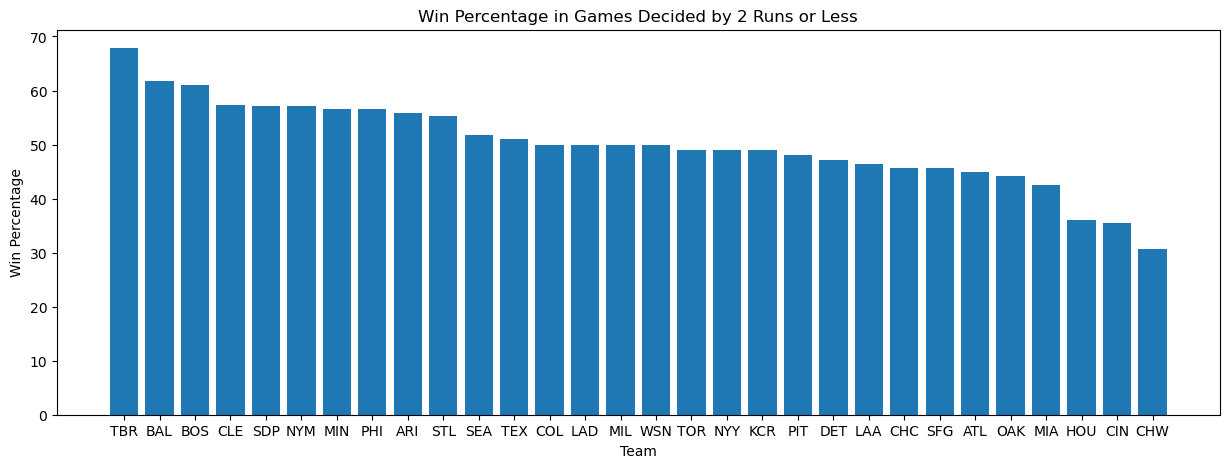

In [232]:
plt.figure(figsize=(15, 5))
plt.bar(df.index, df['Win Percentage'])
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage in Games Decided by 2 Runs or Less')
plt.show()


As you can see the Reds are second to last in the league in close games. They are only better than the White Sox, which are the worst team in general right now. This is a big reason why the Reds are not doing well.